In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Data

In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.count()

day            246
month          245
year           245
Temperature    245
 RH            245
 Ws            245
Rain           245
FFMC           245
DMC            245
DC             245
ISI            245
BUI            245
FWI            245
Classes        244
dtype: int64

# Drop Row by index

In [6]:
df.drop([122,123],inplace=True)

# Removing the extra space from beginning characters and end of characters

In [7]:
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [8]:
df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

# Change the Data type of features

In [9]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(6), int32(5), object(3)
memory usage: 23.8+ KB


# Adding new column region

In [11]:
df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

# checking null value

In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

# we found one null value in 'Classes' feature

In [13]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

# Here replacing not fire = 0 ,fire = 1

In [14]:
df['Classes']=df['Classes'].map({'not fire':0,'fire':1})

In [16]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,bejaia
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,bejaia
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,Sidi-Bel Abbes
242,27,9,2012,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,0.0,Sidi-Bel Abbes
243,28,9,2012,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,Sidi-Bel Abbes
244,29,9,2012,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,Sidi-Bel Abbes


In [18]:
df['Classes']=df['Classes'].fillna(df['Classes'].mode()[0])

In [19]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [20]:
df['date']=pd.to_datetime(df[['day','month','year']])


In [21]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,bejaia,2012-06-03
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,bejaia,2012-06-04
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,Sidi-Bel Abbes,2012-09-26
242,27,9,2012,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,0.0,Sidi-Bel Abbes,2012-09-27
243,28,9,2012,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,Sidi-Bel Abbes,2012-09-28
244,29,9,2012,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,Sidi-Bel Abbes,2012-09-29


# DATA Observation

# Statistical analysis

In [22]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.565574
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.496700
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


In [23]:
df.shape

(244, 16)

# Numerical feature

In [26]:
num_feature=[feature for feature in df.columns if df[feature].dtypes !='O']
print('number of numerical variable: ',len(num_feature))

number of numerical variable:  13


# Categorical feature

In [27]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('number of categorical_features: ',len(categorical_features))



number of categorical_features:  3


C:\Users\nikhi\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


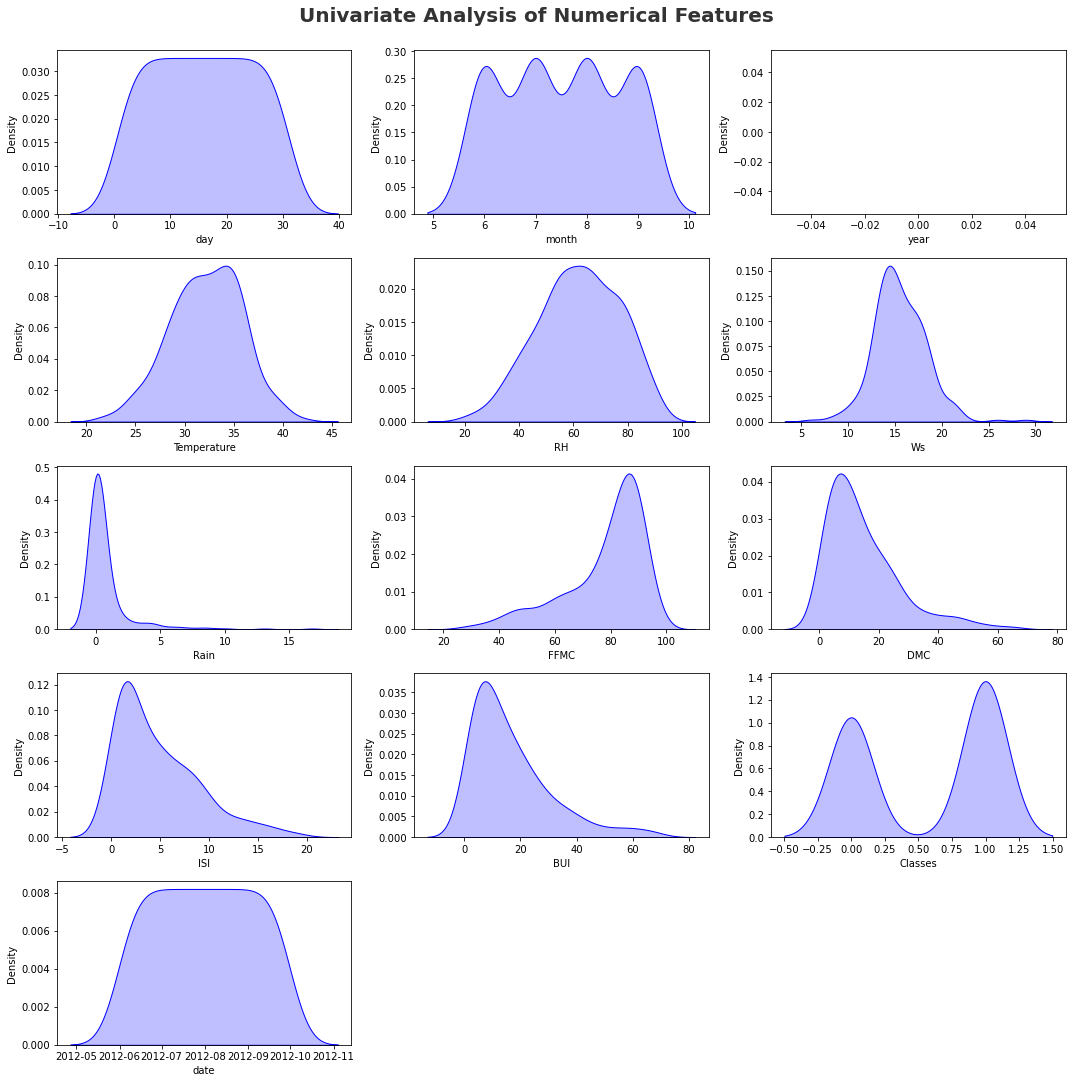

In [29]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_feature[i]],shade=True, color='b')
    plt.xlabel(num_feature[i])
    plt.tight_layout()

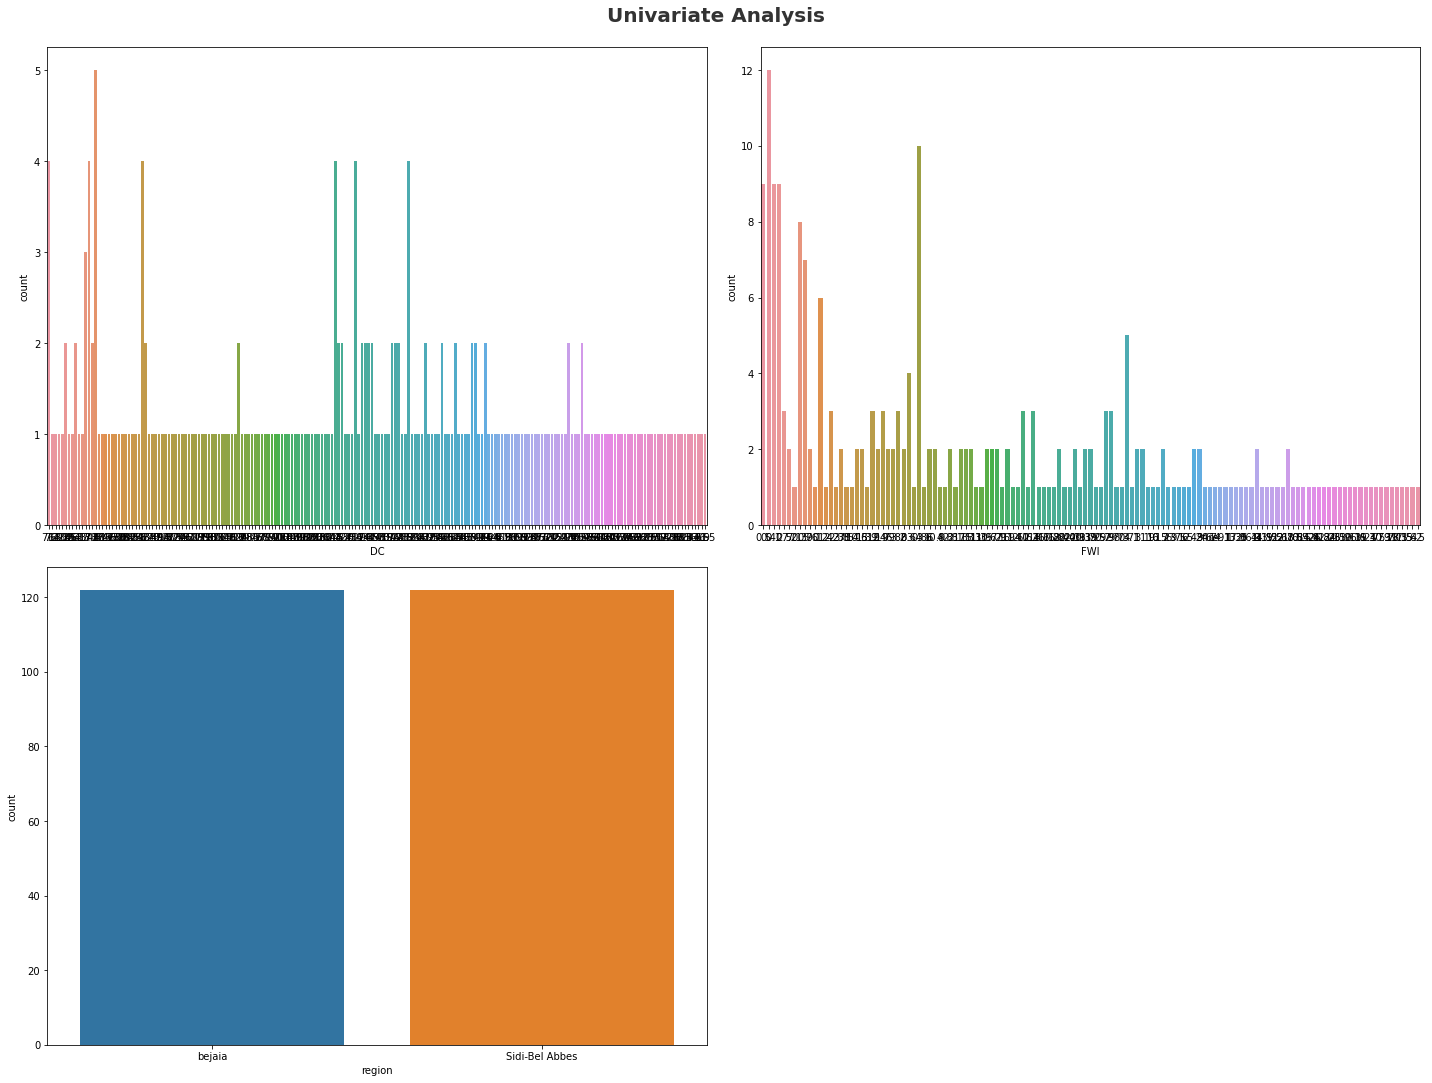

In [31]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['DC', 'FWI','region']
for i in range(0, len(cat1)):
    plt.subplot(2,2, i+1)
    sns.countplot(x=df[cat1[i]],data=df)
    plt.xlabel(cat1[i])
    plt.tight_layout()

In [32]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,bejaia,2012-06-03
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,bejaia,2012-06-04
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,bejaia,2012-06-05


In [41]:
import matplotlib


In [38]:
df['year'].unique()

array([2012])

# we can see temperature on particular date

<AxesSubplot:xlabel='date', ylabel='Temperature'>

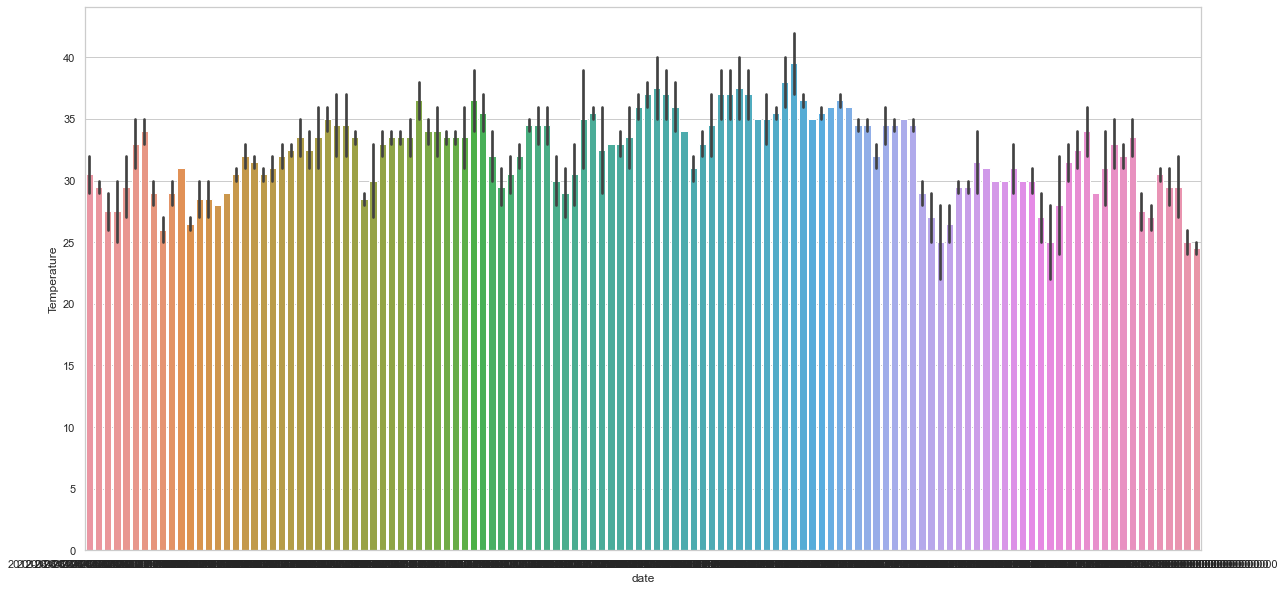

In [70]:
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="date",y="Temperature",data=df)

<AxesSubplot:xlabel='region', ylabel='Classes'>

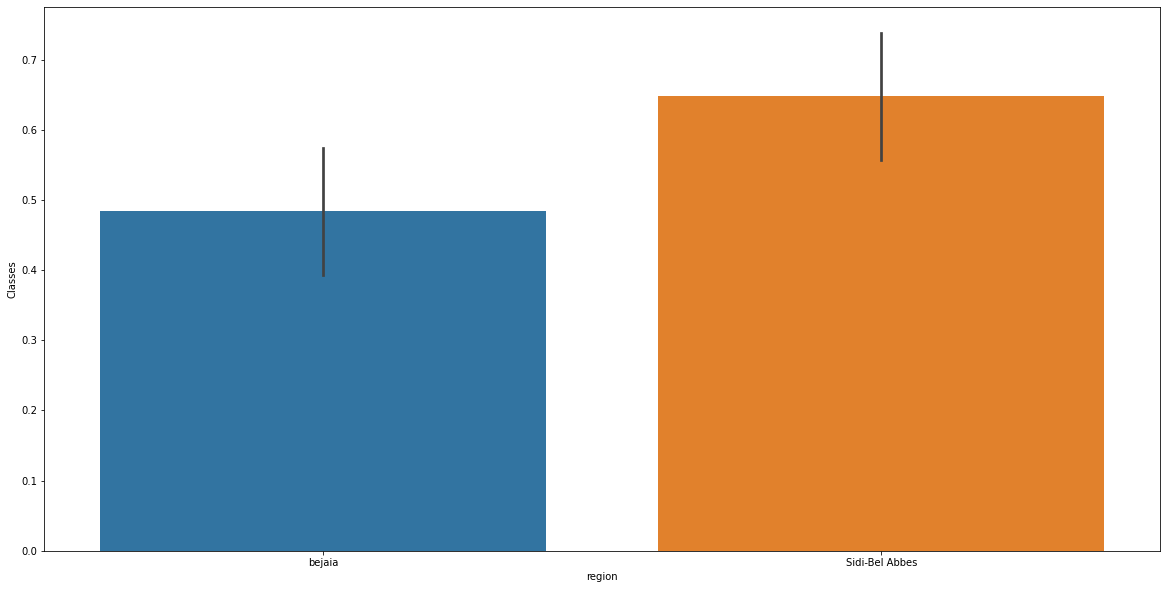

In [36]:
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Classes",data=df)


<AxesSubplot:xlabel='region', ylabel='Rain'>

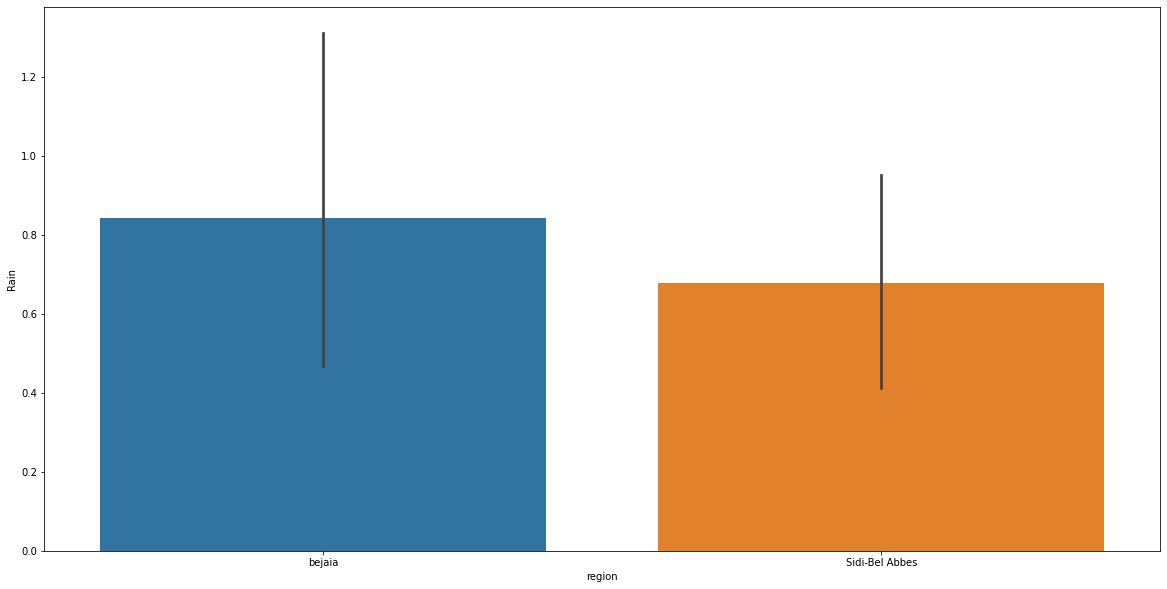

In [40]:
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Rain",data=df)

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

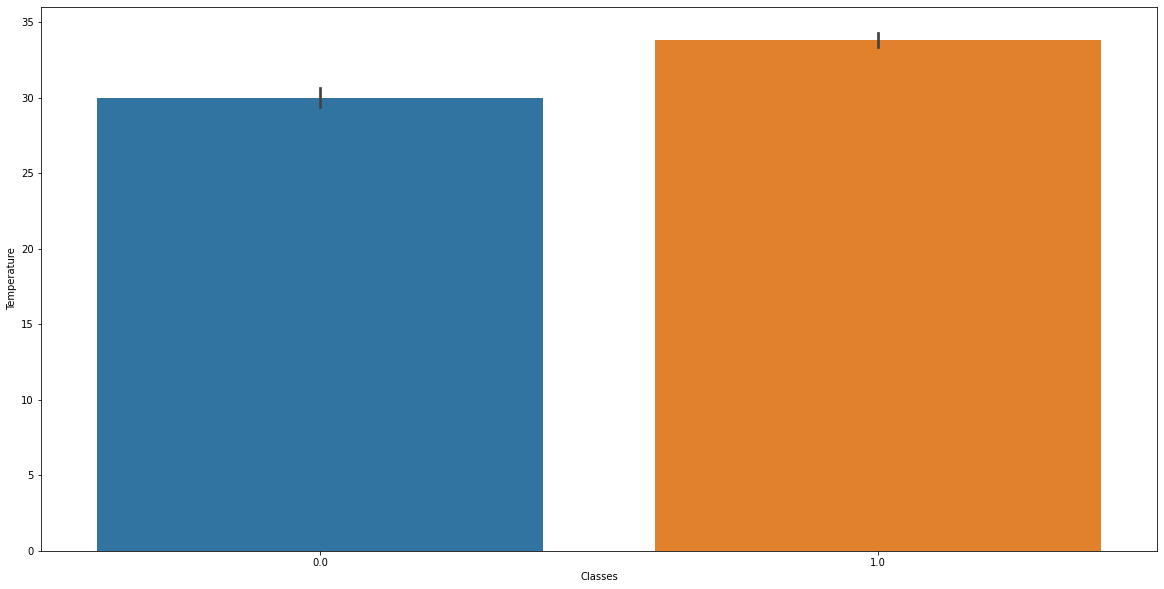

In [42]:
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Classes",y="Temperature",data=df)

<AxesSubplot:xlabel='region', ylabel='Temperature'>

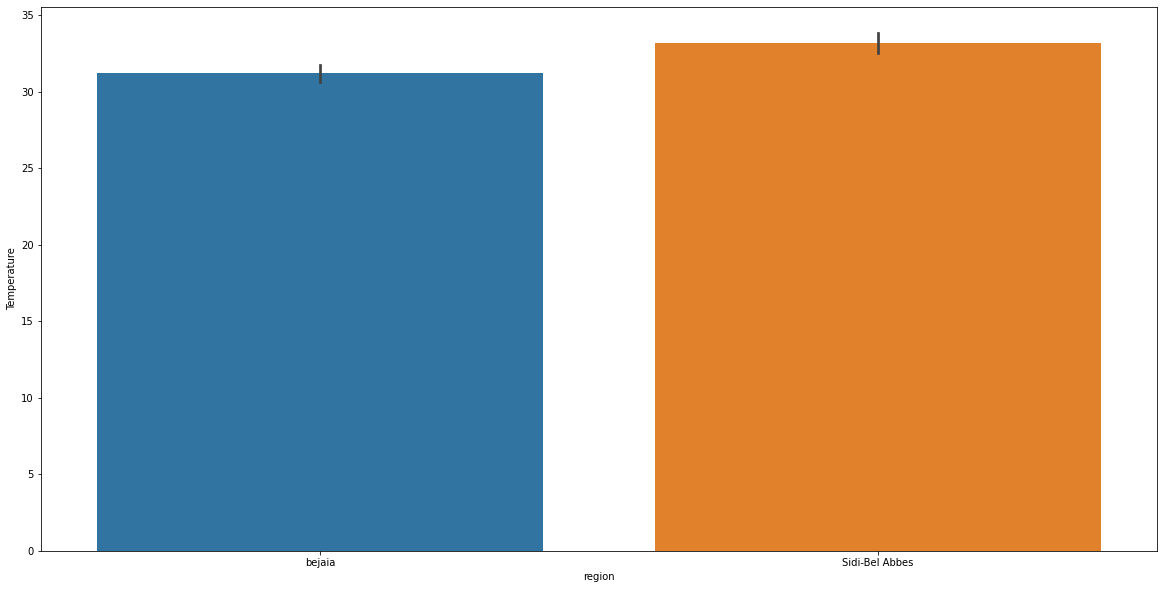

In [43]:
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Temperature",data=df)

# 1:-In bejaia region rain more as compare to sidi-bel abbes region


# 2:-In bejaia region temperature less as compare to sidi-bel abbes region

# 3:-In bejaia region fire less as compare to sidi-bel abbes region

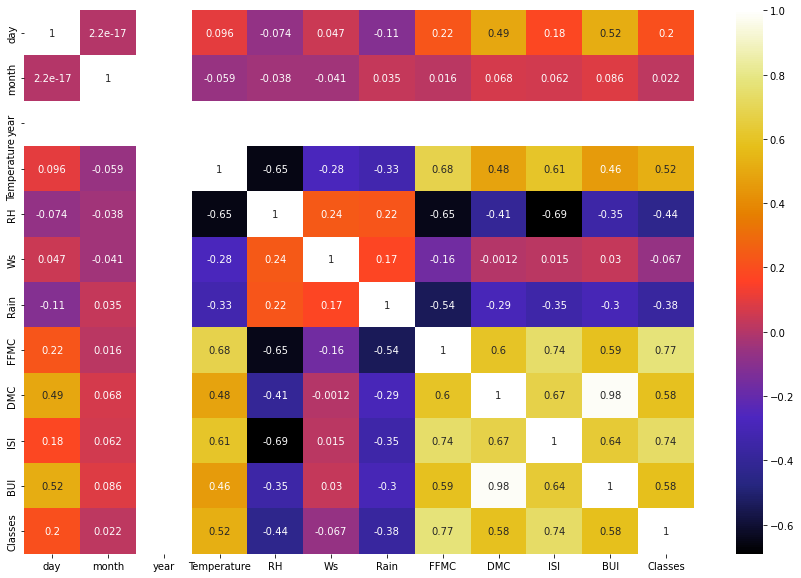

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True)
plt.show()

In [46]:
import seaborn as sns

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

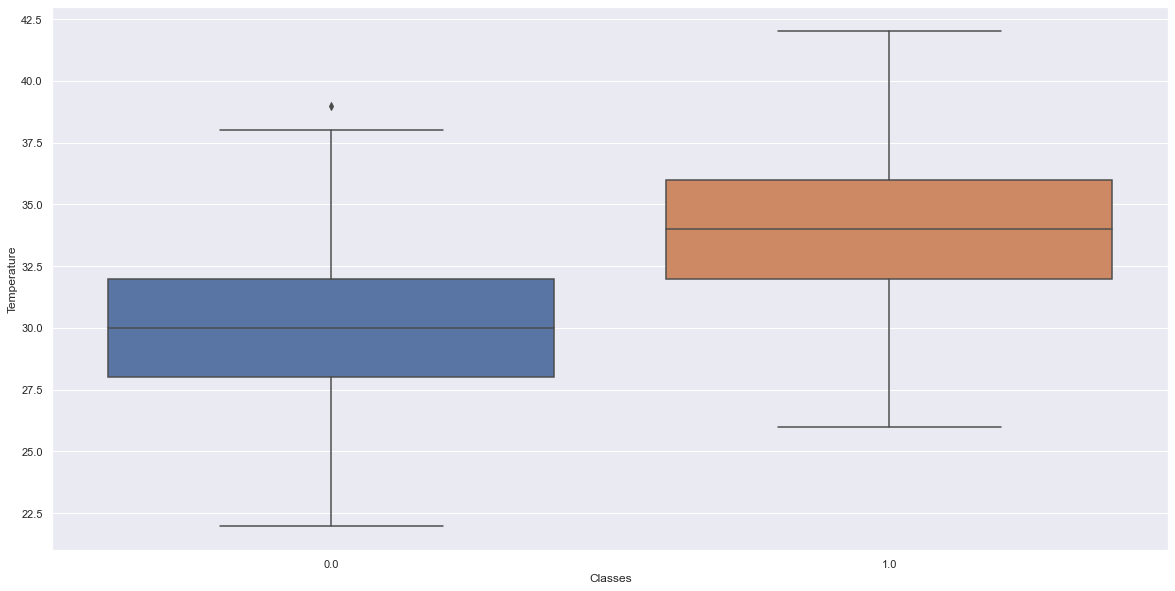

In [71]:
sns.set(style="darkgrid")

sns.boxplot(x ='Classes', y ='Temperature', data = df)